<a href="https://colab.research.google.com/github/samruddhi-27/Interior-Design-Website/blob/main/FIRE_DETECTION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def load_data(image_path, label_path):
    images = []
    labels = []

    for image_file in os.listdir(image_path):
        image = Image.open(os.path.join(image_path, image_file)).convert('RGB')
        image = np.array(image)
        image = image.astype(np.float32)

        # Resize (adjust as needed)
        image = image / 255.0  # Normalize (adjust as needed)

        label_file_path = os.path.join(label_path, os.path.splitext(image_file)[0] + '.txt')

        if not os.path.exists(label_file_path):
            print(f"Warning: Label file not found for image {image_file}. Skipping.")
            continue

        with open(label_file_path, 'r') as f:
            label_data = f.readlines()

        if not label_data:
            print(f"Warning: Label file is empty for image {image_file}. Skipping.")
            continue

        images.append(image)
        labels.append(label_data)

    return images, labels

In [4]:
train_images_path = '/content/drive/MyDrive/Fire_data/images/train'  # Adjust if mounted
train_labels_path = '/content/drive/MyDrive/Fire_data/labels/train'  # Adjust if mounted
val_images_path = '/content/drive/MyDrive/Fire_data/images/valid'  # Adjust if mounted
val_labels_path = '/content/drive/MyDrive/Fire_data/labels/valid'  # Adjust if mounted
test_images_path = '/content/drive/MyDrive/Fire_data/images/test'  # Adjust if mounted
test_labels_path = '/content/drive/MyDrive/Fire_data/labels/test'  # Adjust if mounted


In [5]:
train_images, train_labels = load_data(train_images_path, train_labels_path)
val_images, val_labels = load_data(val_images_path, val_labels_path)
test_images, test_labels = load_data(test_images_path, test_labels_path)


In [6]:
def visualize_data(images, labels):
    for i in range(3):
        image = images[i]
        label = labels[i]

        plt.imshow(image)

        x_min, y_min, x_max, y_max = label[1:] * np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])


In [ ]:
!pip install git+https://github.com/ultralytics/yolov5  # Install directly using pip


  Cloning https://github.com/ultralytics/yolov5 to /tmp/pip-req-build-8u4ofdj_
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/yolov5 /tmp/pip-req-build-8u4ofdj_
  Resolved https://github.com/ultralytics/yolov5 to commit 920c721ea77315291f987ea5b911be7fb619d134
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


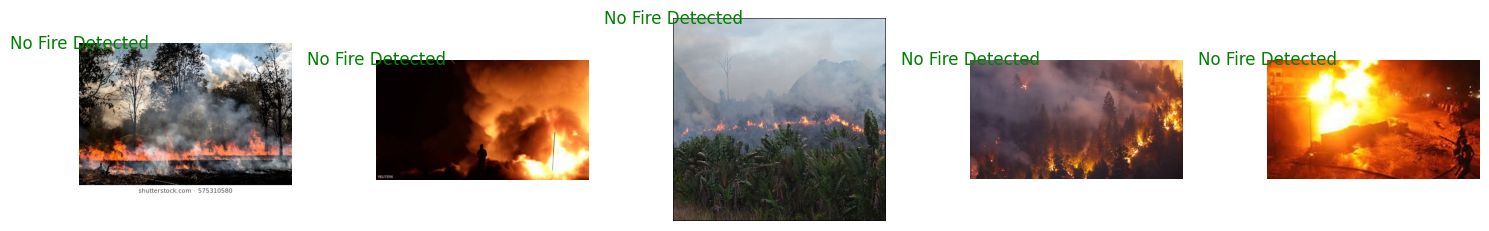

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Select Images (Let's choose the first 5 images)
selected_images = train_images[:5]
selected_labels = train_labels[:5]

# Step 2: Plot Images
fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
for i, (image, labels) in enumerate(zip(selected_images, selected_labels)):
    axes[i].imshow(image)
    axes[i].axis('off')

    # Check if fire is detected in the image
    fire_detected = False
    for label in labels:
        if label[0] == "fire":  # Assuming fire class ID is "fire"
            fire_detected = True
            break

    # Add text to the plot based on fire detection
    if fire_detected:
        axes[i].text(0.5, 0.5, "Fire Detected", ha="center", va="center", color="red", fontsize=12)
    else:
        axes[i].text(0.5, 0.5, "No Fire Detected", ha="center", va="center", color="green", fontsize=12)

# Step 3: Show the Plots
plt.tight_layout()
plt.show()